In [60]:
import numpy as np
import matplotlib.pyplot as plt

In [61]:
!pip install imageio[pyav]

In [62]:
import requests
from PIL import Image
import io
import numpy as np

# URL of the image
img_url = "https://github.com/chiru30/COMP-6321-Machine-Learning/blob/main/major%20assignment%202/Question%201/bird.png?raw=true"

# Download the image using requests
response = requests.get(img_url)
image = Image.open(io.BytesIO(response.content))

# Convert the image to a numpy array
image_np = np.array(image)

# Normalize the image
normalized_image = image_np / 255.0



In [63]:
def plot_colour_space (RGB, title = None, hold = False, **kwargs) :
  if hold:
    ax = plt.gca()
  else:
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(projection = "3d")
  kwargs.setdefault("alpha",1.0)
  ax.scatter(*RGB.T, **kwargs)
  ax.set_xlabel("R", color="r", fontweight="bold", fontsize=15)
  ax.set_ylabel("G", color="g", fontweight="bold", fontsize=15)
  ax.set_zlabel("B", color="b", fontweight="bold", fontsize=15)
  if title is not None:
    ax.set_title(title)

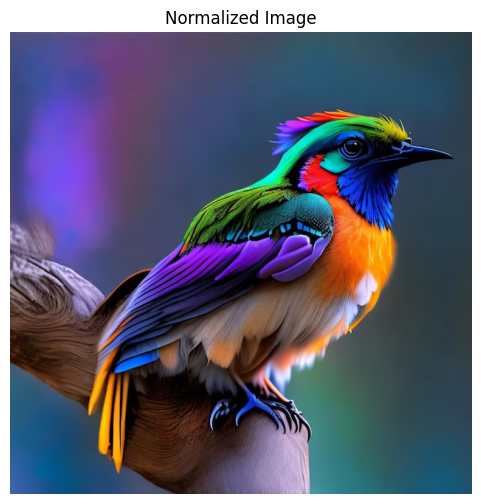

In [64]:
plt.figure(figsize=(6, 6))
plt.imshow(image_np)
plt.title("Normalized Image")
plt.axis('off')
plt.show()


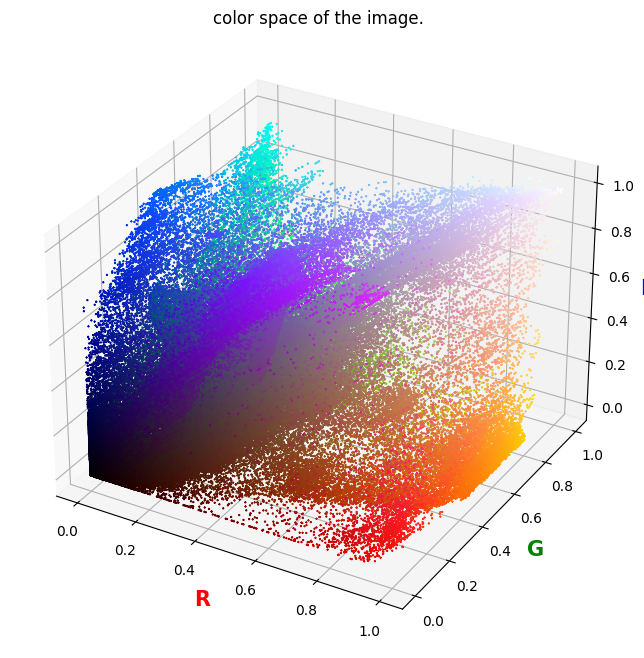

In [65]:
RGB = normalized_image.reshape((-1, 3))
plot_colour_space(RGB, c= RGB, s=0.5, marker="x", title="color space of the image.")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


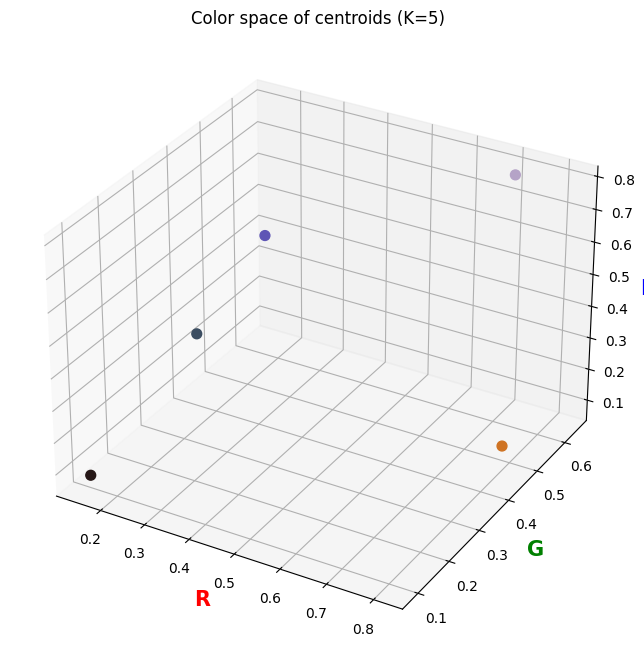

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


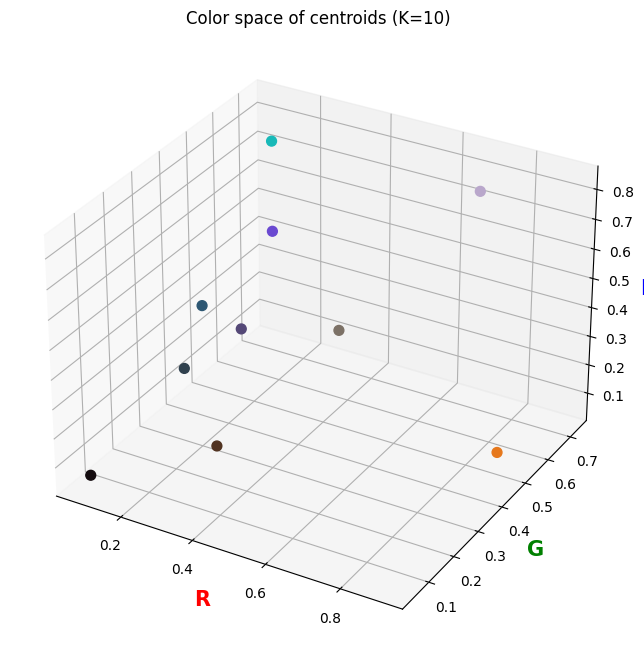

In [66]:
from sklearn.cluster import KMeans

def kmeans_clustering(image_array, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(image_array)
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_
    return centroids, labels

# K=5 clustering
centroids_5, labels_5 = kmeans_clustering(RGB, k=5)
plot_colour_space(centroids_5, c=centroids_5, s=50, marker="o", title="Color space of centroids (K=5)")
plt.show()

# K=10 clustering
centroids_10, labels_10 = kmeans_clustering(RGB, k=10)
plot_colour_space(centroids_10, c=centroids_10, s=50, marker="o", title="Color space of centroids (K=10)")
plt.show()


In [67]:
from sklearn.cluster import KMeans

# Define a function for plotting the color space and recolored image
def plot_recolored_image(image_np, k_value):
    # Normalize the image
    normalized_image = image_np / 255.0

    # Reshape the image into a 2D array of RGB values
    RGB = normalized_image.reshape((-1, 3))

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=k_value, random_state=42)
    kmeans.fit(RGB)

    # Obtain the recolored image from KMeans clustering result
    recolored_image = kmeans.cluster_centers_[kmeans.labels_]


    # Plot color space with recolored pixels
    plot_colour_space(RGB, c=recolored_image, s=0.8, marker="s", title=f'Recolored pixels K={k_value}')

    # Plot the recolored image
    plt.figure(figsize=(13, 3))
    plt.title(f'Recolored Image with K={k_value}')
    plt.imshow(recolored_image.reshape(image_np.shape))
    plt.axis('off')
    plt.show()




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


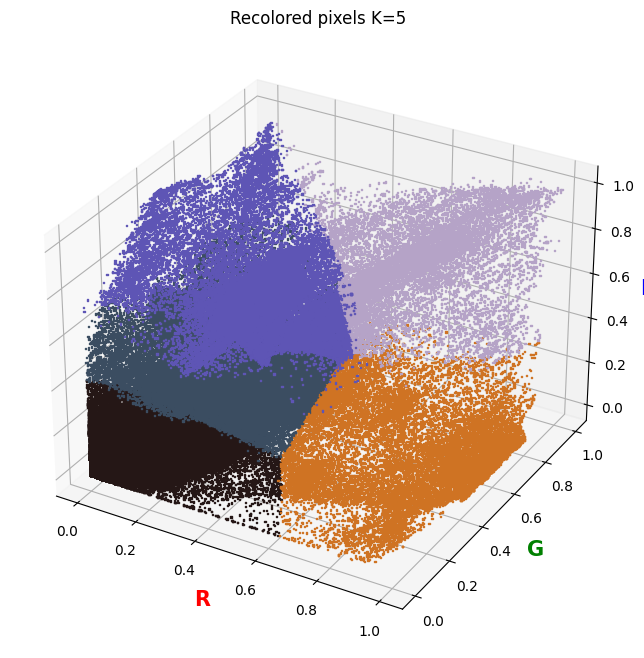

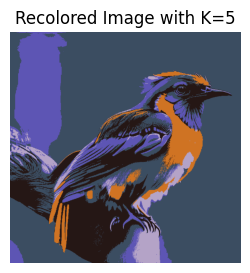

In [68]:
plot_recolored_image(image_np, k_value=5)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


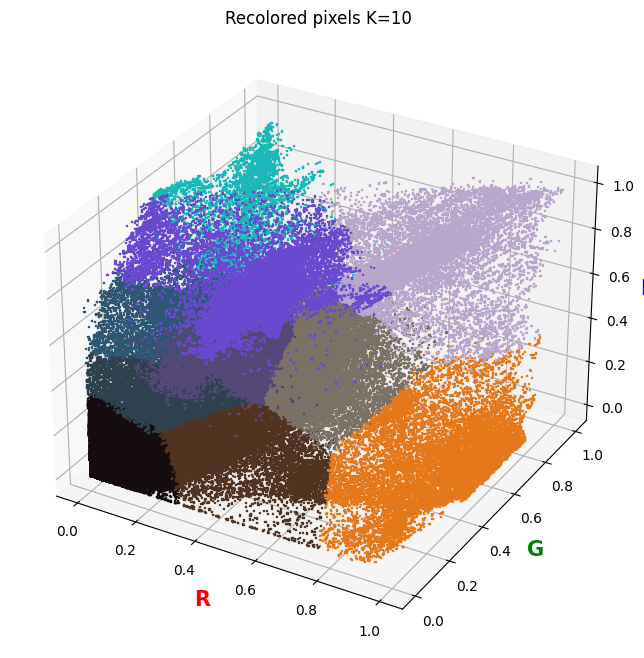

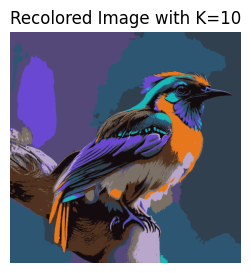

In [69]:
plot_recolored_image(image_np, k_value=10)

In [75]:
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error

def compute_mse(image_np, k_value):
    # Normalize the image
    normalized_image = image_np / 255.0

    # Reshape the image into a 2D array of RGB values
    RGB = normalized_image.reshape((-1, 3))

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=k_value, random_state=42, n_init=10)  # Explicitly set n_init to avoid the warning
    kmeans.fit(RGB)

    # Obtain the labels from KMeans clustering
    labels = kmeans.labels_

    # Reshape the labels to the shape of the original image
    labels_reshaped = labels.reshape(image_np.shape[:2])

    # Create recolored image from cluster centers using labels
    recolored_image = kmeans.cluster_centers_[labels]

    # Calculate MSE between original and recolored images
    mse = mean_squared_error(RGB, recolored_image)
    print(f'Mean Squared Error for K={k_value}: {mse}')

# Compute MSE for K=5 and K=10
compute_mse(image_np, k_value=5)
compute_mse(image_np, k_value=10)


Mean Squared Error for K=5: 0.01078073793166708
Mean Squared Error for K=10: 0.005877169982157815
